<a href="https://colab.research.google.com/github/trich9/DataScienceWebsite/blob/main/Copy_of_Data_Science_2023_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [3]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [4]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [5]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [6]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [48]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [49]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [50]:
X.shape

(60000, 1, 28, 28)

In [51]:
x = X[3,0,:,:]

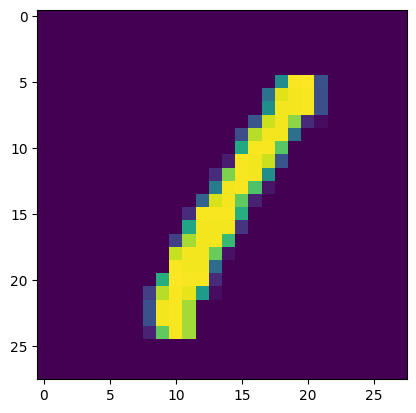

In [52]:
plt.imshow(x)

In [53]:
x.shape

(28, 28)

In [54]:
x = x.reshape(28*28,1)

In [55]:
x.shape

(784, 1)

In [56]:
x = x.reshape(28,28)

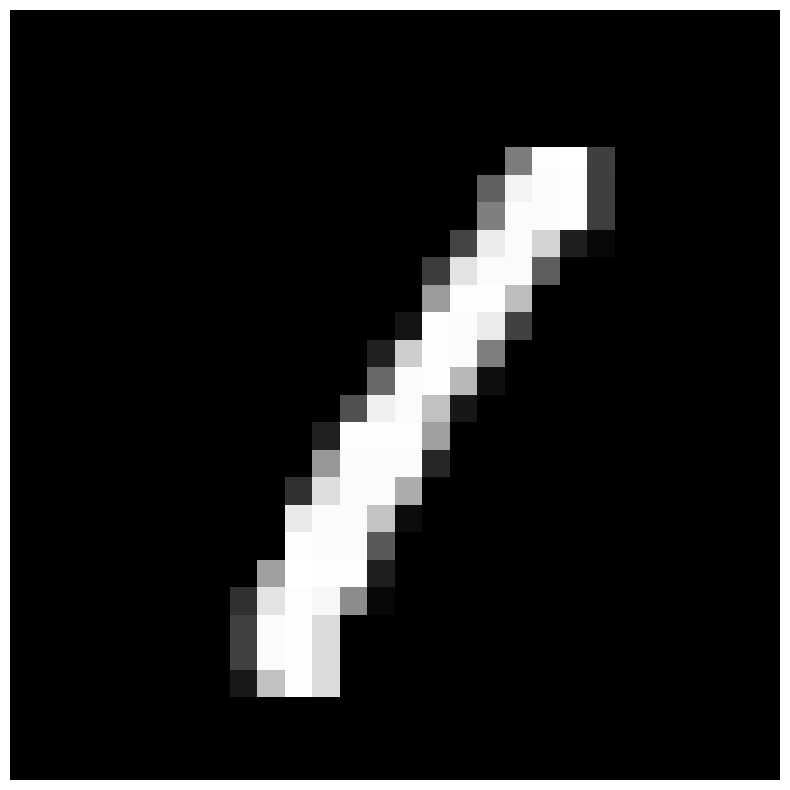

In [57]:
plot(x)

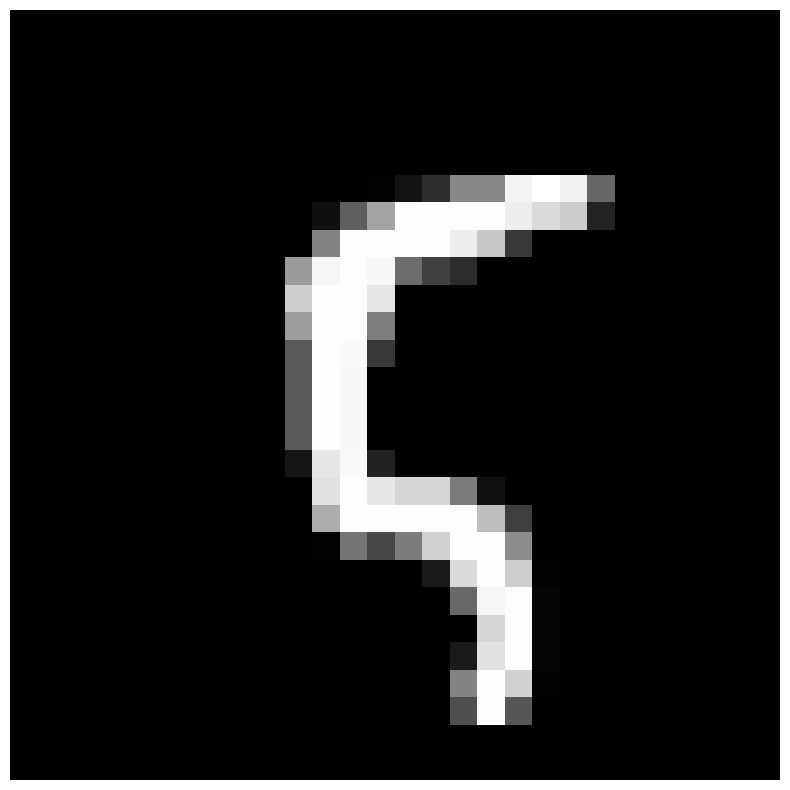

In [58]:
plot(X[100,0,:,:])

In [59]:
Y[100]

5

In [60]:
X[0:25,0,:,:].shape

(25, 28, 28)

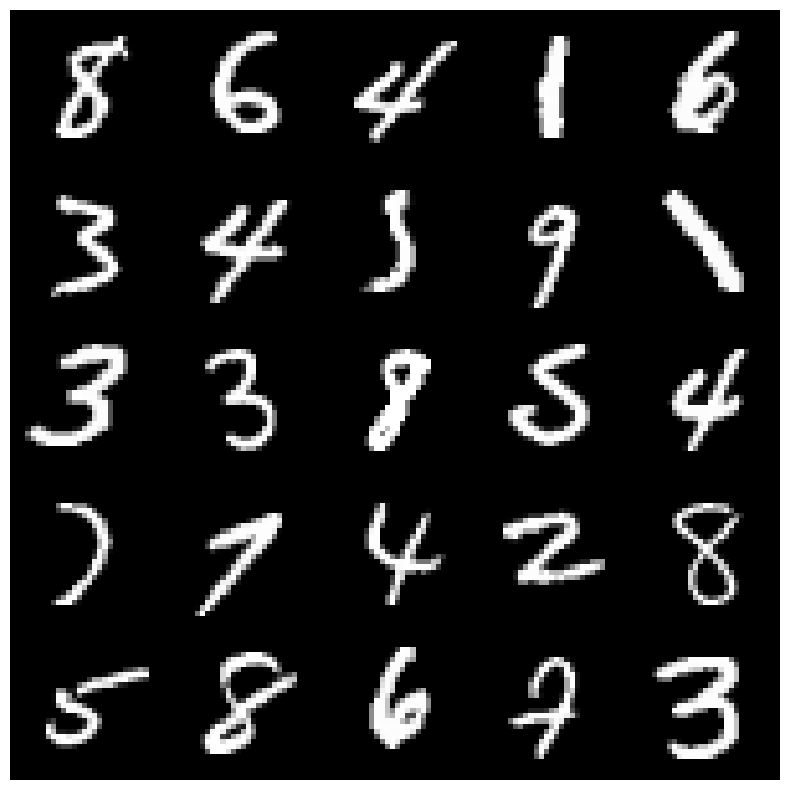

In [61]:
montage_plot(X[125:150,0,:,:])

In [62]:
X.shape[0]

60000

In [63]:
X_test.shape

(10000, 1, 28, 28)

In [64]:
X.shape[0]

60000

In [65]:
X_test.shape[0]

10000

In [66]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [20]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

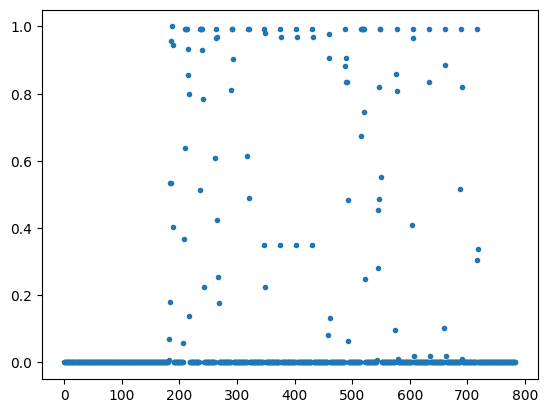

In [67]:
plt.plot(X[100],'.')

In [68]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [69]:
###################################################

In [70]:
X.shape

torch.Size([60000, 784])

In [71]:
X = X.T

In [78]:
X.shape

torch.Size([784, 60000])

In [79]:
x = X[:,13]

In [80]:
Y[13]

tensor(6., device='cuda:0')

In [81]:
M = np.random.rand(10,784)

In [82]:
M.shape, x.shape

((10, 784), torch.Size([784]))

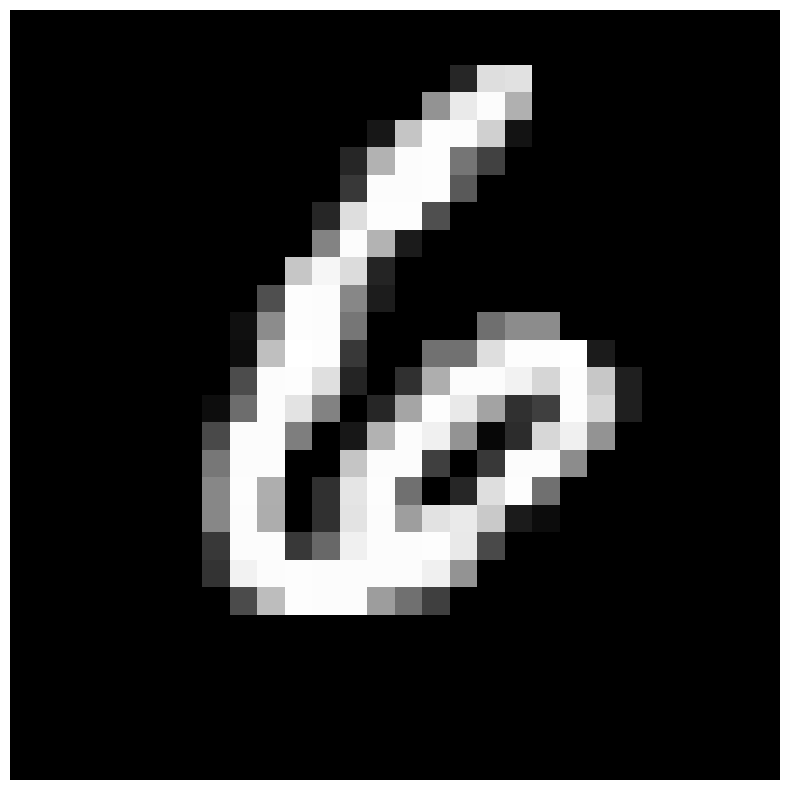

In [83]:
plot(x.reshape(28,28))

In [84]:
M = GPU(np.random.rand(10,784))

In [85]:
M.shape, x.shape

(torch.Size([10, 784]), torch.Size([784]))

In [86]:
M@x

tensor([51.3598, 55.3295, 58.2374, 58.8585, 54.2188, 56.1767, 55.1869, 58.4722,
        55.6367, 53.5384], device='cuda:0', grad_fn=<MvBackward0>)

In [87]:
y = M@x

In [88]:
y.shape

torch.Size([10])

In [89]:
torch.argmax(y)

tensor(3, device='cuda:0')